<a href=""><img src = "https://cdn-images-1.medium.com/max/1200/1*u16a0WbJeckSdi6kGD3gVA.jpeg" width = 400> </a>
<h1 align="center"><font size=5 color="DE5538">Iris Dataset</font></h1>

## Introduction
We have been provided with Iris-Species dataset which includes attributes about the Flower(Species) such as Sepal/Petal length and Width.<br>
User need to Implement a Machine Learning Model to predict the species from the Sepal and Petal attributes.

In [1]:
# Import all required Libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)

Let's Import the File from URL and view the Realation among them.

In [2]:
columns=["sepal_length" ,"sepal_width" ,"petal_length" ,"petal_width" ,"target"]
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header=None, names=columns )
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check Rows and Columns
print('No. of Rows : {} and columns(Features) : {} in the DataSet'.format(df.shape[0], df.shape[1]))

No. of Rows : 150 and columns(Features) : 5 in the DataSet


In [4]:
# Check for null values
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print(f"No. of Null values in Target : {len(df[df['target'].isnull() == True])}")

No. of Null values in Target : 0


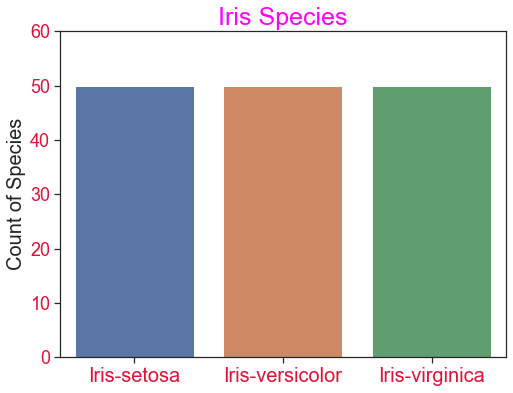

In [6]:
# Check the Species Distribution
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(data=df, x='target', ax=ax )
ax.set_title(label="Iris Species", color='magenta', fontsize=25)
ax.set_ylabel("Count of Species", fontsize=20)
ax.set_xlabel("")

plt.yticks(ax.get_yticks(), color='crimson', size=18)
plt.xticks(ax.get_xticks(), color='crimson', size=20)
plt.show()

### <li>We can observe there are no missing values in the DataSet<li>The Species are distributed evenly in the Data set

In [7]:
name = "petal_width"
str.replace(name,'_',' ').capitalize()

'Petal width'

## Data Visualization

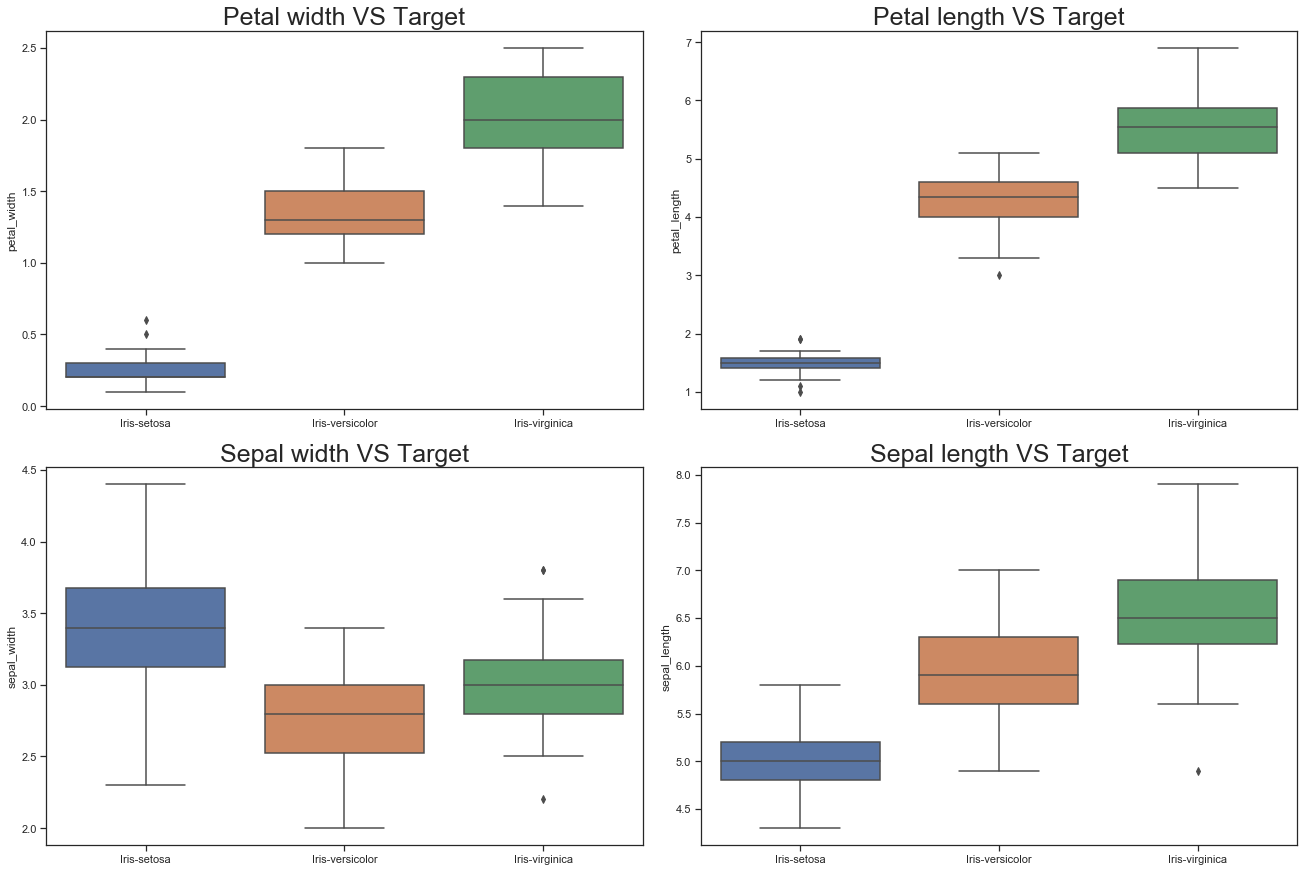

In [8]:
fig, axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True, figsize=(18,12))

params = {'legend.fontsize': 'x-large',
#           'figure.figsize': (18, 12),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'25',
         'axes.labelcolor':'firebrick',
         'text.color':'magenta',
         'xtick.color':'crimson',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

for i in range(len(axes)):
    y_tag = 'petal' if i==0 else 'sepal'
    
    ax = axes[i][0]
    y_column = y_tag + '_width'
    title = str.replace(y_column, '_', ' ').capitalize() + ' VS Target'
    _= sns.boxplot(data=df, ax=ax, x='target', y=y_column)
    _= ax.set(ylabel=y_column, xlabel="", title=title )
    
    ax = axes[i][1]
    y_column = y_tag + '_length'
    title = str.replace(y_column, '_', ' ').capitalize() + ' VS Target'
    _= sns.boxplot(data=df, ax=ax, x='target', y=y_column)
    _= ax.set(ylabel=y_column, xlabel="", title=title )
    
plt.rcParams.clear()

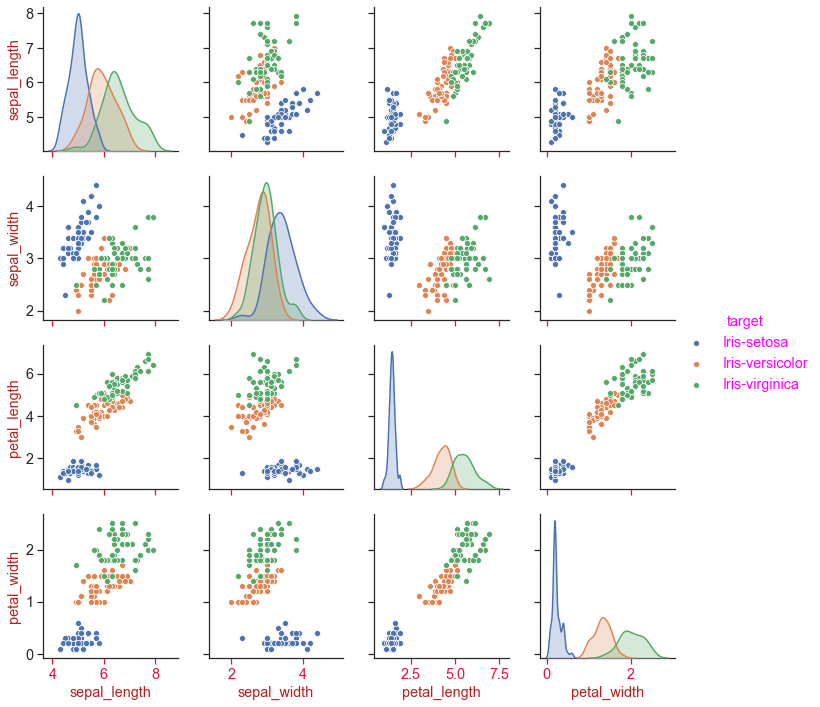

In [9]:
# Draw a pairplot to understand the relation with different attributes
_ = sns.pairplot(df, hue='target')

### Observations
<li>We can easily distinguish Setosa with others from Petal Length and Petal Width
<li>Versicolor and Virginica are closey related with each other and overlaps on many attributes.

## Feature Selection, Normalization and Spliting

In [3]:
features = columns[:-1]
X = df[features]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Normalize data

In [16]:
from sklearn import preprocessing
# X = preprocessing.StandardScaler().fit(X).transform(X)
X = preprocessing.MinMaxScaler().fit(X).transform(X)
le = preprocessing.LabelEncoder()
y = le.fit_transform(df.target)
X[:5], y[:5]

(array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
        [0.16666667, 0.41666667, 0.06779661, 0.04166667],
        [0.11111111, 0.5       , 0.05084746, 0.04166667],
        [0.08333333, 0.45833333, 0.08474576, 0.04166667],
        [0.19444444, 0.66666667, 0.06779661, 0.04166667]]),
 array([0, 0, 0, 0, 0]))

### Train Test Split  
Let's split the data in to Training and Testing set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (120, 4) (120,)
Test set: (30, 4) (30,)


#### Function to plot Confusion Matrix

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          title='Confusion matrix'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    from sklearn.metrics import confusion_matrix
    
    data = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(data, columns=classes, index = classes)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (12,8))
    plt.title(title, color='green', fontsize=25)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, color='indigo')
    plt.yticks(tick_marks, classes, color='indigo')
    sns.set(font_scale=1.4) #for label size
    sns.heatmap(df_cm, cmap="YlGnBu", annot=True, annot_kws={"size": 16})# font size 
    plt.tight_layout()
    plt.ylabel('Actual', color='crimson', fontsize=20)
    plt.xlabel('Predicted', color='crimson', fontsize=20)

## Regression Model

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear', multi_class="auto").fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
y_hat = LR.predict(X_test)
y_test, y_hat

(array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]),
 array([2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]))

Accuraccy of Test set : 0.90


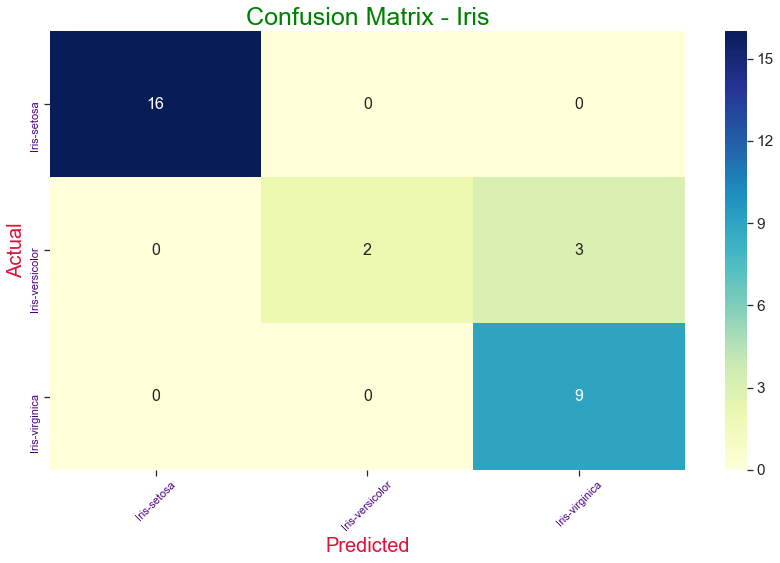

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# Compute confusion matrix
print("Accuraccy of Test set : {0:0.2f}".format(np.mean(y_hat == y_test)))
# print (classification_report(y_test, y_hat))
plot_confusion_matrix(y_test, y_hat, le.classes_, title="Confusion Matrix - Iris")

### Let's Improve the accuracy of the Model using GridSearchCV and Regularization - Hyperparameter Tuning

In [22]:
from sklearn.model_selection import GridSearchCV
hparams ={'C':np.logspace(0, 4, 10), 'penalty':['l1', 'l2']} 
# Create GridSearch using 5 fold cross validation
gsv = GridSearchCV(estimator=LR, param_grid=hparams, cv=5, n_jobs=-1, iid=True)
# Fit the grid search
gsv = gsv.fit(X_test, y_test)
# view the accuracy and best paramters
print(f"Best score : {gsv.best_score_}")
gsv.best_params_

Best score : 0.9


{'C': 2.7825594022071245, 'penalty': 'l1'}

In [23]:
LR = LogisticRegression(C=2.78, solver='liblinear', penalty='l1', multi_class="auto").fit(X_train,y_train)
LR

y_hat = LR.predict(X_test)
y_test, y_hat

(array([2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]),
 array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
        1, 0, 0, 0, 0, 0, 0, 2]))

Accuraccy of Test set : 0.93
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.80      0.80      0.80         5
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.93      0.93      0.93        30



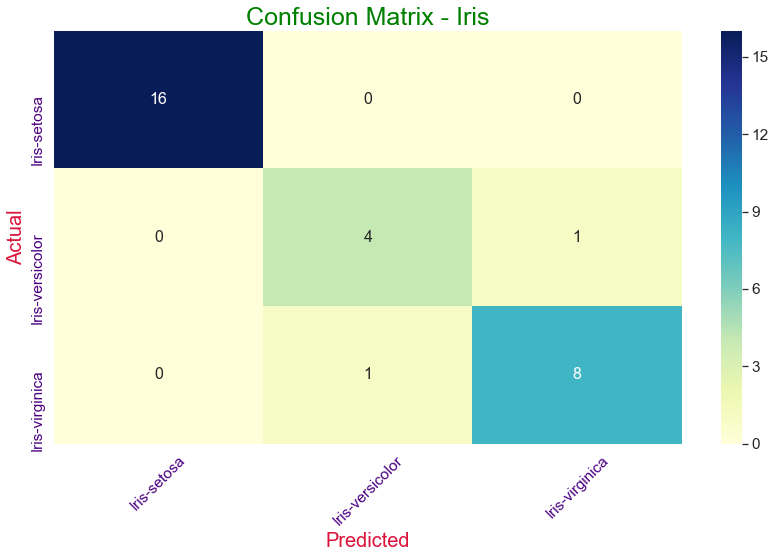

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score
# Compute confusion matrix
print("Accuraccy of Test set : {0:0.2f}".format(np.mean(y_hat == y_test)))
print (classification_report(y_test, y_hat))
plot_confusion_matrix(y_test, y_hat, le.classes_, title="Confusion Matrix - Iris")

### After Hypertuning Accuracy got improved to 93%
#### Let's create the decision boundary for the Sepal Length and Sepal Width

C:\Users\amaindola\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


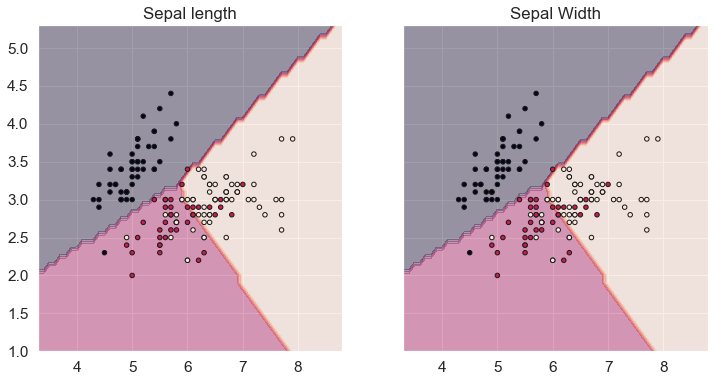

In [35]:
X = df[columns[:-3]]
y = le.fit_transform(df.target)
LR = LogisticRegression(C=2.78, solver='liblinear', penalty='l1', multi_class="auto").fit(X,y)

# Plotting decision regions
x_min, x_max = X['sepal_length'].min() - 1, X['sepal_length'].max() + 1
y_min, y_max = X['sepal_width'].min() - 1, X['sepal_width'].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(nrows=1,ncols=2, sharex='col', sharey='row', figsize=(12, 6))
for idx, tt in enumerate(['Sepal length', 'Sepal Width']):

    Z = LR.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(X['sepal_length'], X['sepal_width'], c=y,
                                 s=20, edgecolor='k')
    axarr[idx].set_title(tt)

plt.show()


### Export the output to File

In [19]:
import os

with open(os.path.join(os.getcwd(),'output.csv'),'w') as file:
    file.writelines('Actual,Predicted\n')
    for (pred, actual) in zip(y_hat, y_test):
        file.writelines("{},{}\n".format(le.classes_[actual], le.classes_[pred]))
        
print("File written successfully !!!")

File written successfully !!!
